In [1]:
# Import the packages required
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import joblib

In [2]:
# load the data from the datasets available in scikit learn
dataset = datasets.load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [3]:
# select the x and y data
x = dataset.data[:, np.newaxis, 5]
y = dataset.target
print(x.shape, y.shape)
print(x[0], y[0])

(506, 1) (506,)
[6.575] 24.0


In [4]:
# Split the dataset in training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 1) (404,)
(102, 1) (102,)


In [5]:
# Define the algorithm to be used, fit the model
alg = linear_model.LinearRegression()
alg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Save a persistency of the fit model in a file
modelfile = '../../data/linear_regression.model'
joblib.dump(alg, modelfile)

['../../data/linear_regression.model']

In [7]:
# Load a persistence fit model from a file
lr = joblib.load(modelfile)

In [8]:
# Generate a prediction over the test data using the model
y_pred = lr.predict(x_test)
print(y_pred.shape)

(102,)


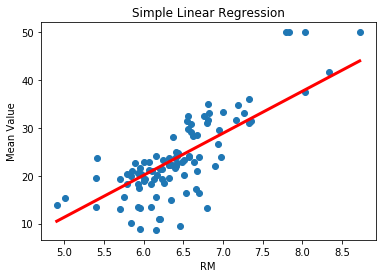

In [9]:
# Graph the test data with the model line
legend = dataset.feature_names[5]
data_test = sorted(zip(x_test, y_pred), key = lambda i : i[0])
plt.scatter(x_test, y_test)
plt.plot([i[0] for i in data_test], [i[1] for i in data_test], color='red', linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel(legend)
plt.ylabel('Mean Value')
plt.show()

In [10]:
# Verify the model error based on R²
print('certainty:', alg.score(x_train, y_train) * 100, '%')
print('certainty:', alg.score(x_test, y_test) * 100, '%')

certainty: 45.26061386359122 %
certainty: 61.67023411943967 %
